In [2]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

In [5]:
#Loading dataset
brainT = pd.read_csv('Braintumor.csv')

In [6]:
#Preview the data
brainT.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.460000e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.460000e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.460000e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.460000e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.460000e-155


In [7]:
brainT.shape

(3762, 14)

In [8]:
#Check to see if anything is missing
brainT.isna().sum()

Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [9]:
brainT.dtypes

Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

In [10]:
#Check some statistics
brainT.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.460000e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.460000e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.460000e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.460000e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.460000e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.460000e-155


In [11]:
#Count the targe value
brainT['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Mean'>

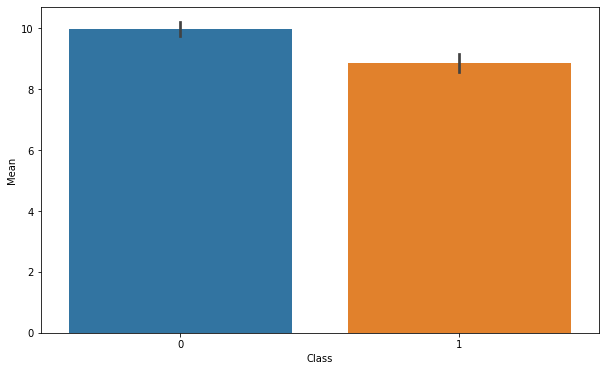

In [12]:
#Comparing Class to mean.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Mean', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Variance'>

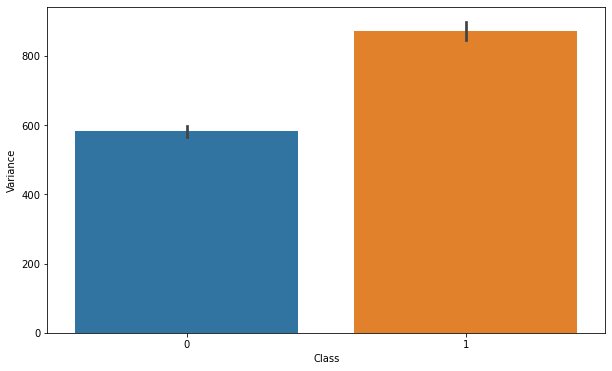

In [13]:
#Comparing Class to Variance
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Variance', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Standard Deviation'>

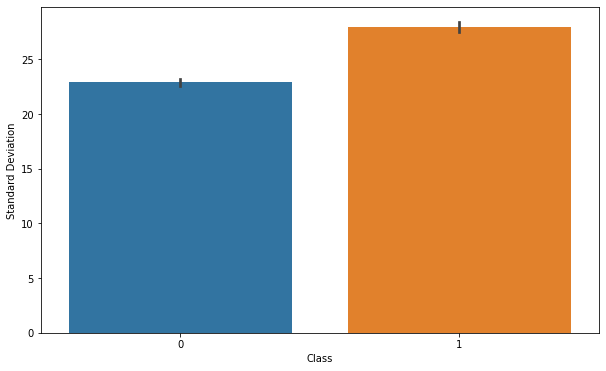

In [14]:
#Comparing Class to Standard Deviation
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Standard Deviation', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Entropy'>

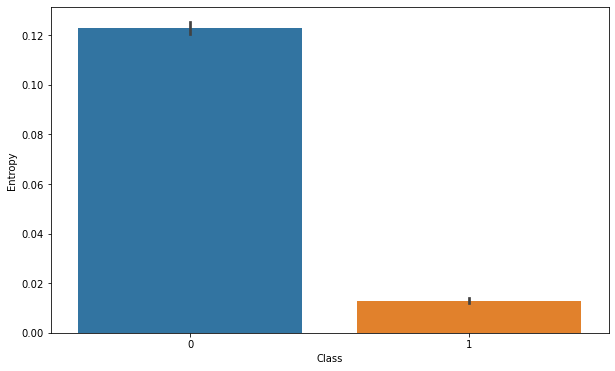

In [15]:
#Comparing Class to Entropy
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Entropy', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Skewness'>

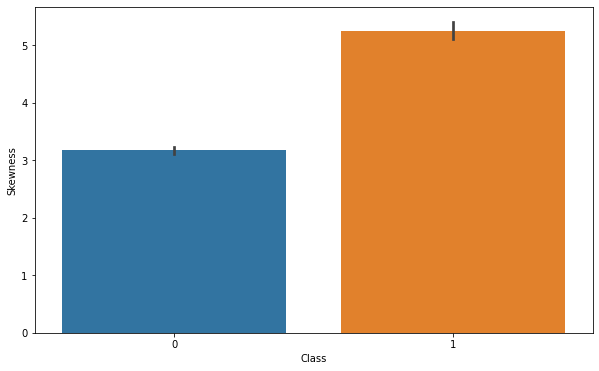

In [16]:
#Comparing Class to Skewness
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Skewness', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Kurtosis'>

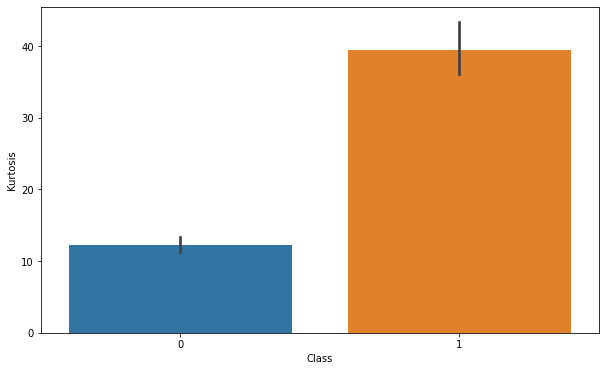

In [17]:
#Comparing Class to Kurtosis
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Kurtosis', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Contrast'>

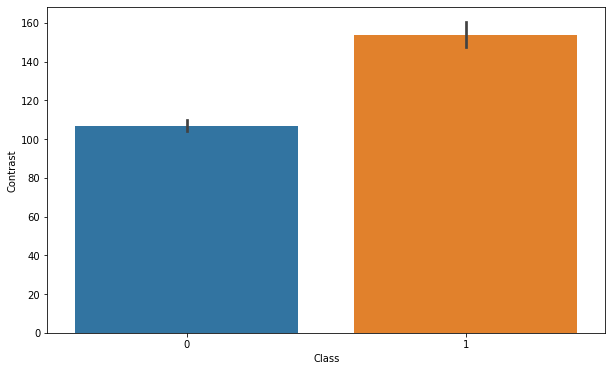

In [18]:
#Comparing Class to Contrast
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Contrast', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Energy'>

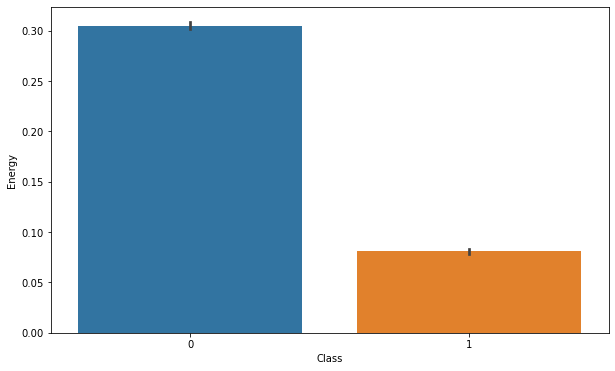

In [19]:
#Comparing Class to Energy
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Energy', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='ASM'>

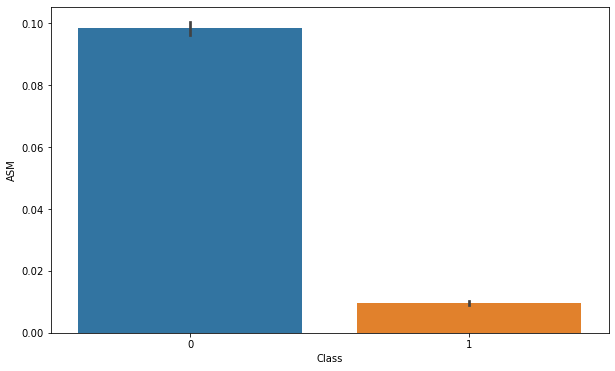

In [20]:
#Comparing Class to ASM
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'ASM', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Homogeneity'>

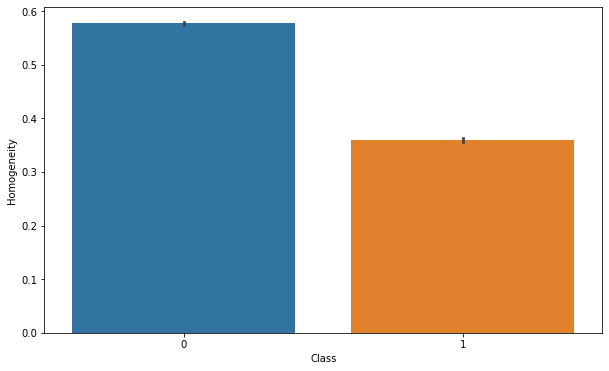

In [21]:
#Comparing Class to Homogeneity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Homogeneity', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Dissimilarity'>

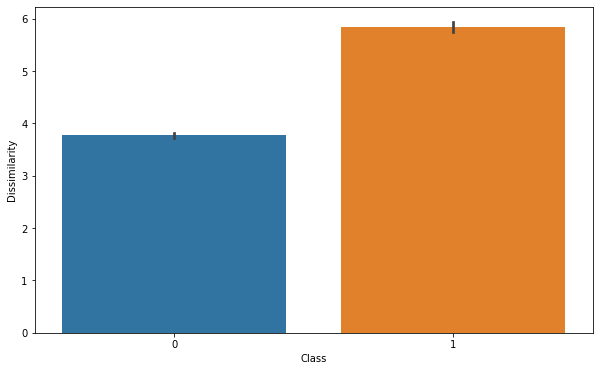

In [22]:
#Comparing Class to Dissimilarity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Dissimilarity', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Correlation'>

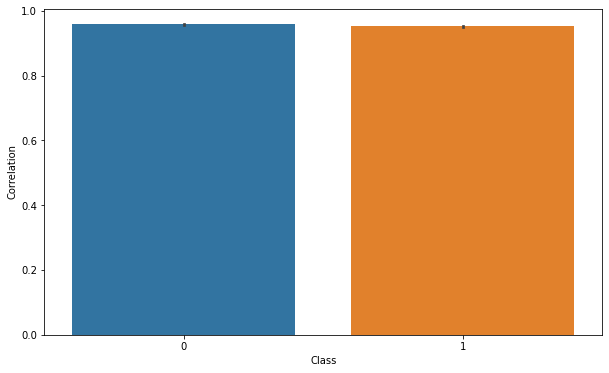

In [23]:
#Comparing Class to Correlation
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Correlation', data = brainT)

<AxesSubplot:xlabel='Class', ylabel='Coarseness'>

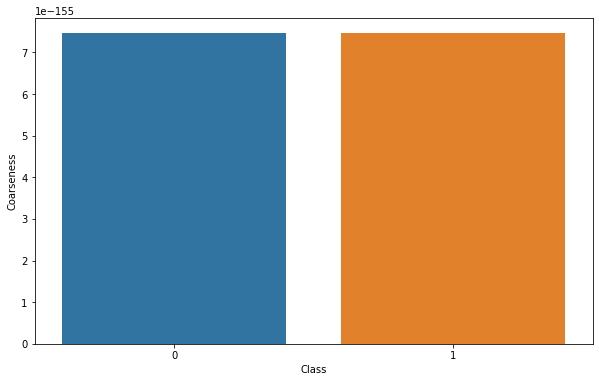

In [24]:
#Comparing Class to Correlation
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Class', y = 'Coarseness', data = brainT)

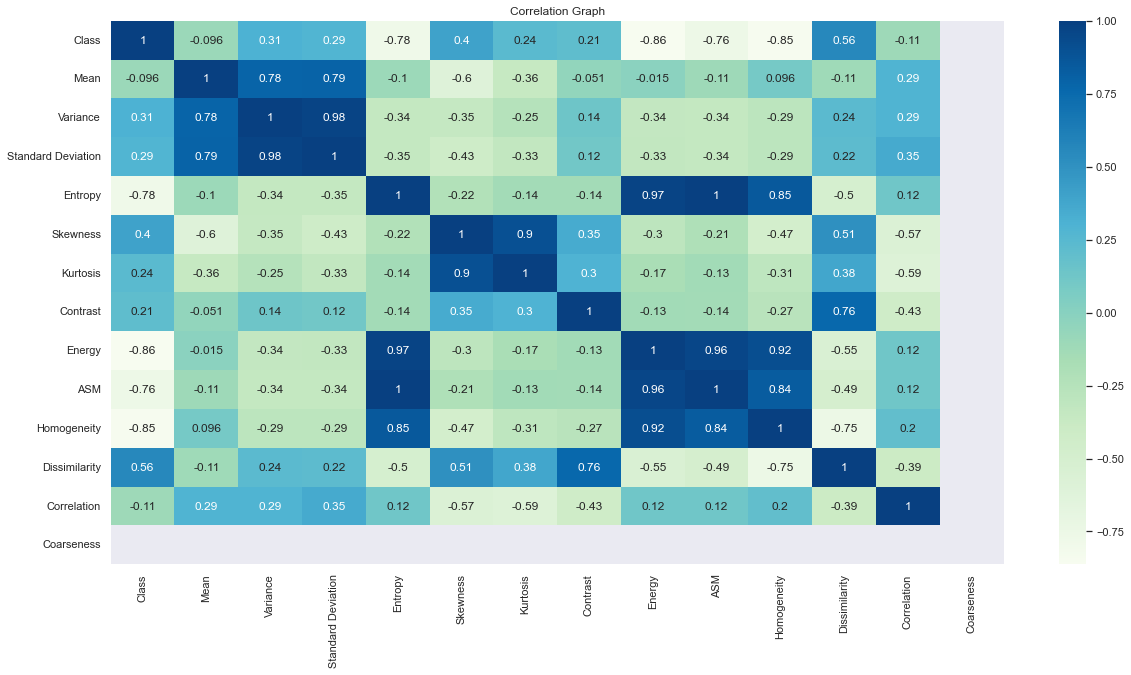

In [25]:
sns.set()
plt.figure(figsize = (20, 10))
sns.heatmap(brainT.corr(), cmap = 'GnBu', annot = True)
plt.title('Correlation Graph')
plt.show()

<AxesSubplot:>

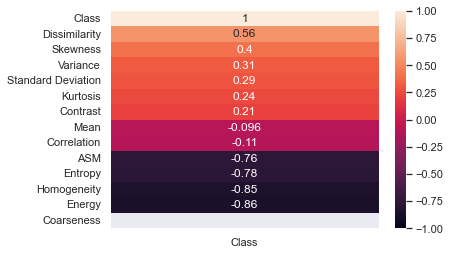

In [27]:
sns.heatmap(brainT.corr()[['Class']].sort_values(by = 'Class', ascending = False), vmin = -1, vmax = 1, annot = True)